<a href="https://www.kaggle.com/code/srsses/multiclass-classification-obesity?scriptVersionId=163284852" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
data_train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
data_test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
data_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


<Axes: xlabel='Gender'>

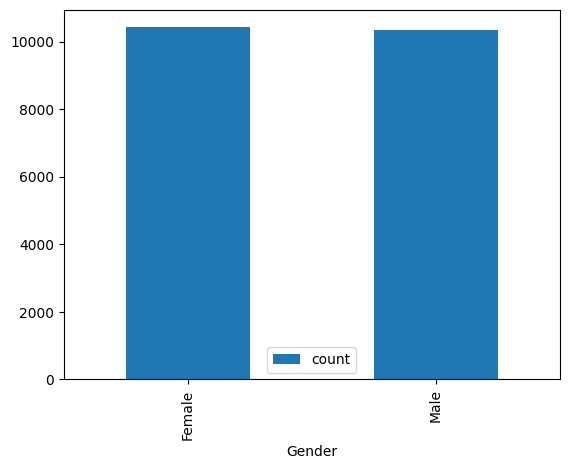

In [3]:
data_train = data_train.drop('id', axis = 1)
data_test = data_test.drop('id', axis = 1)
data_train.Gender.value_counts().reset_index().plot.bar(x = 'Gender', y = 'count')

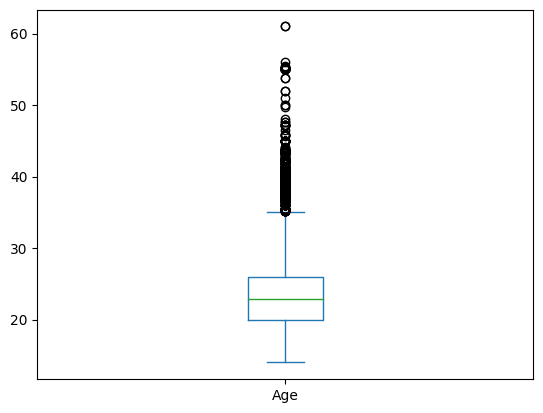

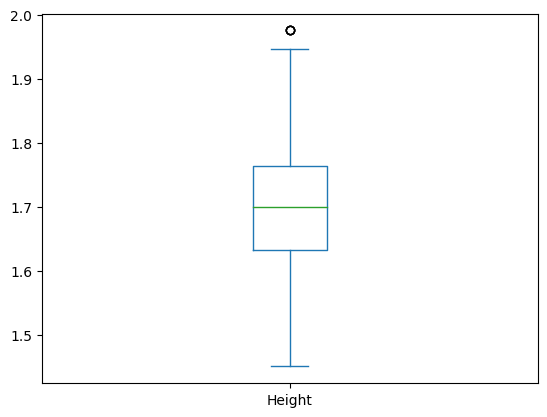

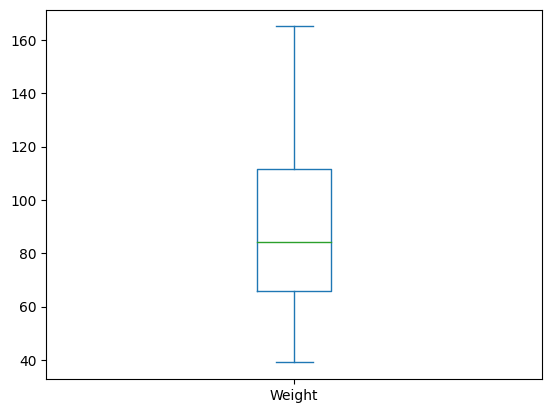

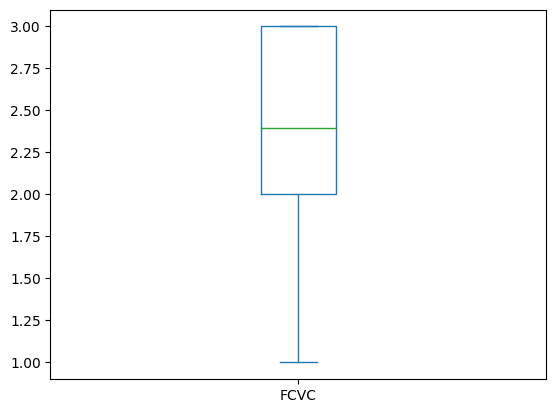

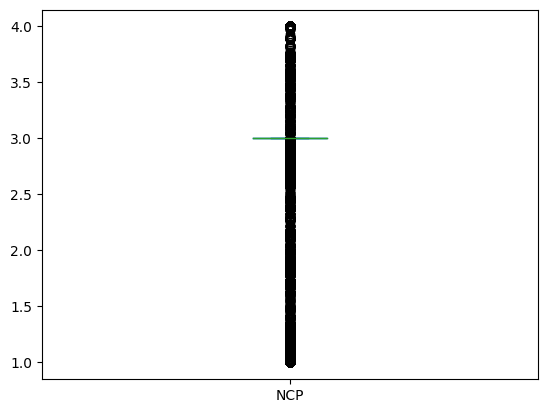

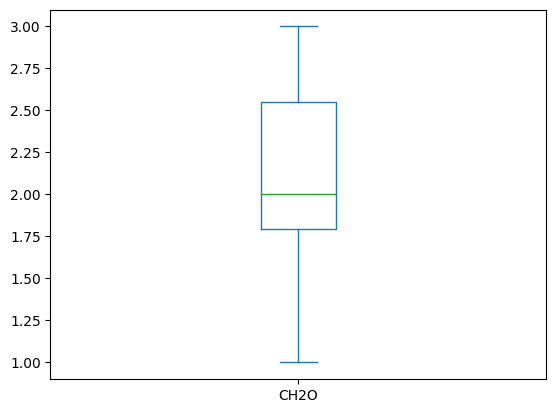

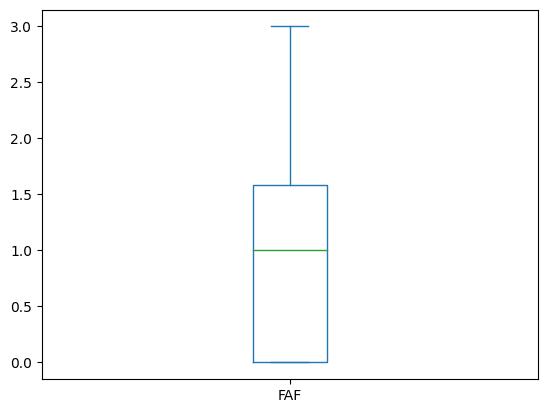

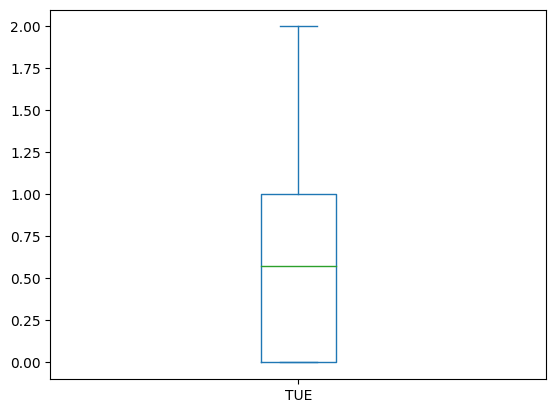

In [4]:
for i in data_train.select_dtypes(include = np.number).columns:
    data_train[[i]].plot.box()

In [5]:
data_train['Age'].loc[data_train['Age']>20]

0        24.443011
3        20.952737
4        31.641081
6        29.883021
7        29.891473
           ...    
20752    40.000000
20753    25.137087
20755    20.101026
20756    33.852953
20757    26.680376
Name: Age, Length: 15088, dtype: float64

In [6]:
np.percentile(data_train['Age'],25)

20.0

In [7]:
def clear_outliers(df,col):
    q1 = np.percentile(df[col],25)
    q3 = np.percentile(df[col],75)
    IQR = q3-q1
    df[col] = np.where(df[col]<(q1-(IQR*1.5)),q1,np.where(df[col]>(q3+(IQR*1.5)),q3,df[col]))
    

In [8]:
for i in data_train.select_dtypes(include = np.number).columns:
    clear_outliers(data_train,i)

In [9]:
for i in data_test.select_dtypes(include = np.number).columns:
    clear_outliers(data_test,i)

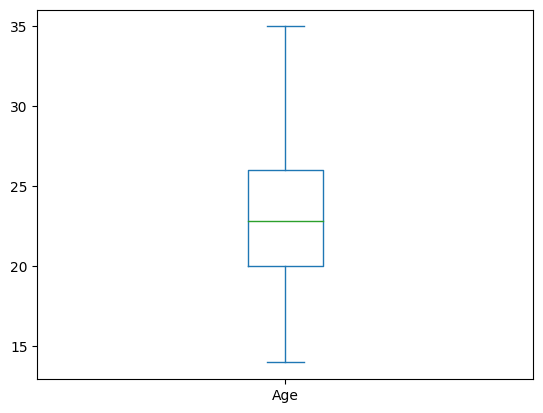

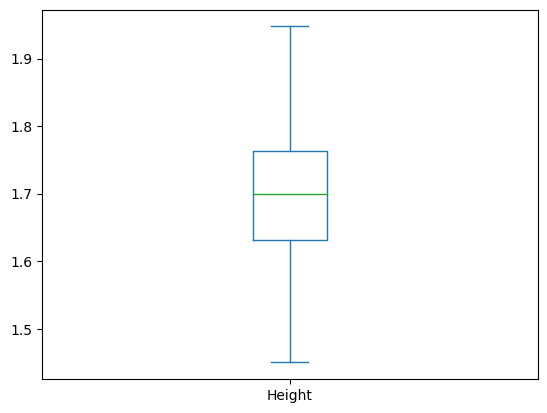

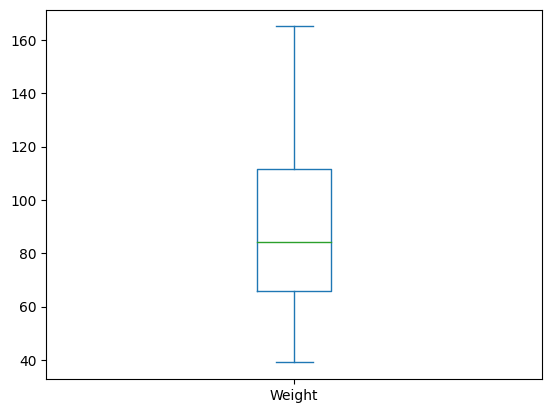

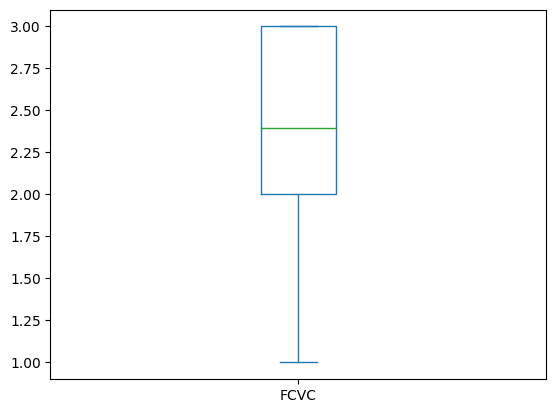

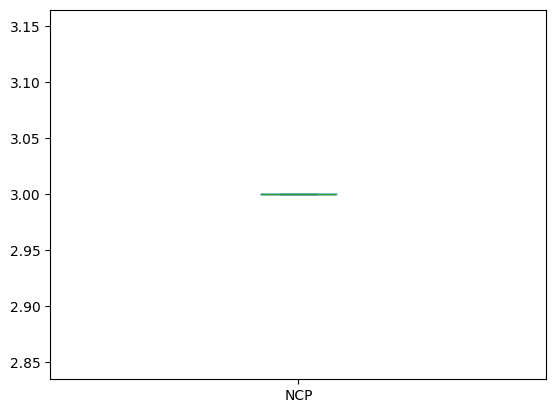

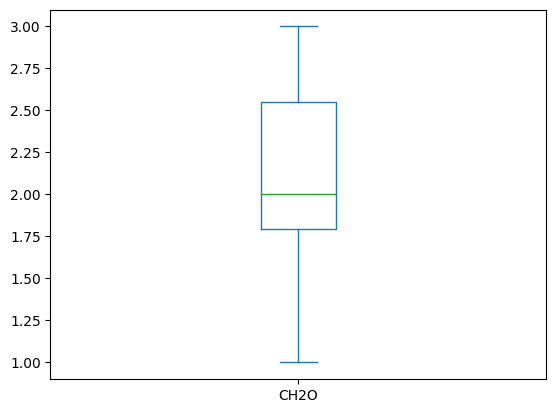

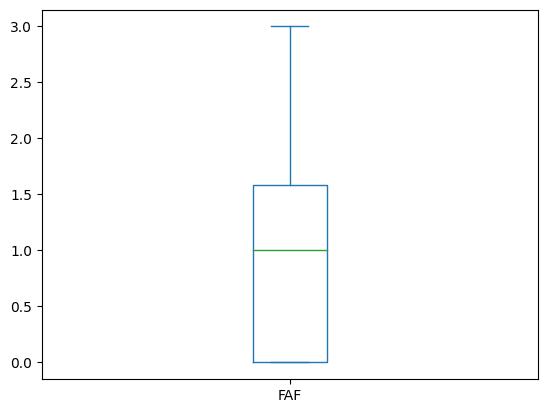

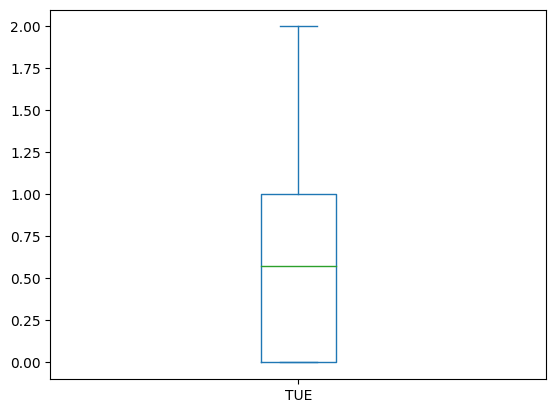

In [10]:
for i in data_train.select_dtypes(include = np.number).columns:
    data_train[[i]].plot.box()

In [11]:
data_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,3.0,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.0,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,3.0,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.0,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,3.0,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [12]:
data_train['Gender'] = np.where(data_train['Gender']=='Male',0,1)
data_test['Gender'] = np.where(data_test['Gender']=='Male',0,1)

In [13]:
data_train['family_history_with_overweight'] = np.where(data_train['family_history_with_overweight']=='yes',0,1)
data_train['FAVC'] = np.where(data_train['FAVC']=='yes',0,1)
data_test['family_history_with_overweight'] = np.where(data_test['family_history_with_overweight']=='yes',0,1)
data_test['FAVC'] = np.where(data_test['FAVC']=='yes',0,1)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
objects = ['CAEC','SMOKE','SCC','CALC','MTRANS']
for i in objects:
    data_train[i] = le.fit_transform(data_train[i])

In [16]:
objects_t = ['CAEC','SMOKE','SCC','CALC','MTRANS']
for i in objects_t:
    data_test[i] = le.fit_transform(data_test[i])

In [17]:
data_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,24.443011,1.699998,81.669950,0,0,2.000000,3.0,2,0,2.763573,0,0.000000,0.976473,1,3,Overweight_Level_II
1,1,18.000000,1.560000,57.000000,0,0,2.000000,3.0,1,0,2.000000,0,1.000000,1.000000,2,0,Normal_Weight
2,1,18.000000,1.711460,50.165754,0,0,1.880534,3.0,2,0,1.910378,0,0.866045,1.673584,2,3,Insufficient_Weight
3,1,20.952737,1.710730,131.274851,0,0,3.000000,3.0,2,0,1.674061,0,1.467863,0.780199,1,3,Obesity_Type_III
4,0,31.641081,1.914186,93.798055,0,0,2.679664,3.0,2,0,1.979848,0,1.967973,0.931721,1,3,Overweight_Level_II


<Axes: xlabel='NObeyesdad'>

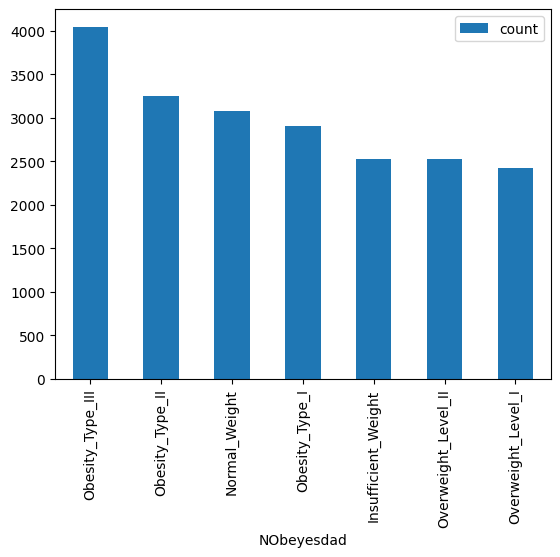

In [18]:
data_train['NObeyesdad'].value_counts().reset_index().plot.bar(x = 'NObeyesdad', y = 'count')

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()

In [20]:
x = data_train.drop('NObeyesdad', axis = 1)
y = data_train['NObeyesdad']
y = le.fit_transform(y)

In [21]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,shuffle = True,random_state= 3)

In [22]:
x_train = sc.fit_transform(x)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lg = LogisticRegression(max_iter = 1000,C = 0.5,solver = "newton-cg",random_state = 1)

In [25]:
from xgboost import XGBClassifier,XGBRFClassifier
xgb = XGBClassifier(random_state = 1)
xgbrf = XGBRFClassifier(random_state = 1)

In [26]:
lg = xgb.fit(x_train,y)

In [27]:
# x_test = sc.transform(x_test)
# pred = lg.predict(x_test)

In [28]:
from sklearn.metrics import f1_score,classification_report
# print(f1_score(y_test,pred,average = 'macro'))
# print(classification_report(y_test,pred))

In [29]:
# C = [0.5,0.6,0.7,0.8,0.9]
# for i in C:
#     lg = LogisticRegression(max_iter = 1000,C = i)
#     lg = lg.fit(x_train,y_train)
#     pred = lg.predict(x_test)
#     print(f1_score(y_test,pred,average = 'macro'))
#     print(classification_report(y_test,pred))

In [30]:
data_test = sc.transform(data_test)
pred1 = lg.predict(data_test)

In [31]:
sub = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")

In [32]:
sub.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [33]:
sub['NObeyesdad'] = le.inverse_transform(pred1)

In [34]:
sub.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [35]:
sub.to_csv("submission.csv",index = False)